<a href="https://colab.research.google.com/github/Ibilis37/DSP_/blob/main/%D0%9C%D0%9E%D0%A6%D0%9E%D0%A1_3__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ3
#### –ö–æ–º–æ–ª—å—Ü–µ–≤–∞ –î–∏–∞–Ω–∞ –ü–ú-32
### –í–∞—Ä–∏–∞–Ω—Ç 1

### –ó–∞–¥–∞–Ω–∏–µ 1
–°–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–µ—Ä–µ–∫—É—Ä—Å–∏–≤–Ω—ã–π —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–π —Ñ–∏–ª—å—Ç—Ä –ø–æ—Ä—è–¥–∫–∞ N=2M

(–ö–ò–•-—Ñ–∏–ª—å—Ç—Ä —Å –ª–∏–Ω–µ–π–Ω–æ–π —Ñ–∞–∑–æ–π —Ç–∏–ø–∞ I, —Å –ß–• (4.1) —Å
–∑–∞–¥–∞–Ω–Ω–æ–π –≤ —Ç–∞–±–ª–∏—Ü–µ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –ø–æ–ª–æ—Å–æ–π –ø—Ä–æ–ø—É—Å–∫–∞–Ω–∏—è, –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ
—Ä–µ—à–µ–Ω–∏—é –ø—Ä–∏–º–µ—Ä–∞ 4.2).

 –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –∞–º–ø–ª–∏—Ç—É–¥–Ω–æ-—á–∞—Å—Ç–æ—Ç–Ω—É—é –∏
—Ñ–∞–∑–æ—á–∞—Å—Ç–æ—Ç–Ω—É—é —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏. –°—Ä–∞–≤–Ω–∏—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—É—é –ê–ß–• —Å
–∏–¥–µ–∞–ª—å–Ω–æ–π.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import freqz
from scipy.optimize import minimize
from scipy.signal import filtfilt
from PIL import Image
import cv2

In [20]:
# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ–∏–ª—å—Ç—Ä–∞
w_p = [0, 0.6*np.pi]
w_s = [0.8*np.pi,np.pi]
M = 5  # M
N = 2*M
w_j = np.pi * (np.arange(M+1) + 0.5)/(M + 1)
K_d = (w_j >= w_p[0]) & (w_j < w_p[1])
w_0 = -2*np.pi
w_n = 2*np.pi
w = np.arange(w_0, w_n+0.01, 0.01)

In [21]:
# –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ñ–∏–ª—å—Ç—Ä–∞
def find_coef(M, K_d):
  h = np.zeros(M+1)
  for k in range(M+1):
      for j in range(M+1):
          h[M - k] +=  np.abs(K_d[j]) * np.cos(np.pi * k * (2*j + 1) / (2*(N + 1)))/(M + 1)
  return h

# –∏–¥–µ–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ñ–∏–ª—å—Ç—Ä–∞
def IdealFilter(w_p, N):
    b1 = np.ceil(w_p[0] * (N + 1) /np.pi - 0.5).astype(int)
    b2 = np.floor(w_p[1] * (N + 1) / np.pi - 0.5).astype(int)
    kd = np.zeros(N + 1)
    val = np.arange(b1 + 1, b2 + 1)
    kd[val] = np.ones(len(val))
    kd[0] = 1
    return kd
# –ê–ß–•
def AFR(h, w, M):
  A = np.zeros(len(w))
  for i in range(len(w)):
      A[i] = h[M]
      for k in range(1,M+1):
          A[i] += 2*h[M - k] * np.cos(w[i] * k)
  return A
# –∏–¥–µ–∞–ª—å–Ω–∞—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞ —Ñ–∏–ª—å—Ç—Ä–∞
def IdealResponse(w, w_0):
    r = np.zeros(len(w_0))
    for i in range(len(w_0)):
        pos = np.sign(w_0[i]) * (np.mod(np.abs(w_0[i]) + np.pi, 2 * np.pi) - np.pi)
        pos = np.abs(pos)
        if (pos >= w[0]) and (pos < w[1]):
            r[i] = 1
        else:
            r[i] = 0
    return r


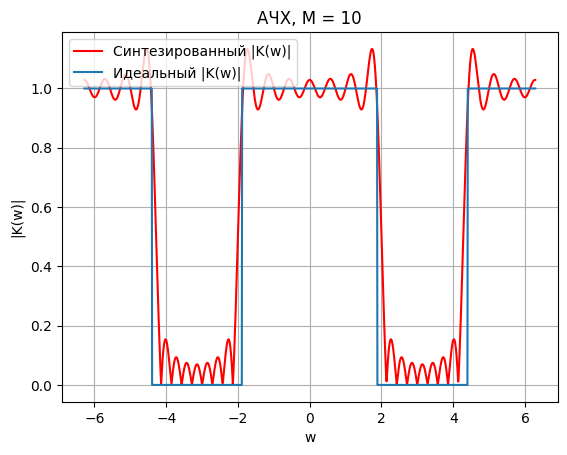

In [22]:
f = find_coef(N, IdealFilter(w_p, N))
afr = AFR(f, w, N)
plt.figure()
plt.plot(w, np.abs(afr), 'r')
plt.plot(w, IdealResponse(w_p, w))
plt.legend(['–°–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π |K(w)|', '–ò–¥–µ–∞–ª—å–Ω—ã–π |K(w)|'], loc='upper left')
plt.xlabel('w')
plt.ylabel('|K(w)|')
plt.title(f'–ê–ß–•, M = {N}')
plt.grid(True)
plt.show()

In [23]:
# –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —à–∫–∞–ª–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ñ–∏–ª—å—Ç—Ä–∞
def LogFR(K_d):
    r = np.zeros(len(K_d))
    for i in range(len(K_d)):
        if K_d[i] < 10**(-7):
            r[i] = 10**(-7)
        else:
            r[i] = K_d[i]
    r = 20 * np.log10(r)
    return r

# —É–¥–≤–∞–∏–≤–∞–µ–º –∏ —Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ–º –≤–µ–∫—Ç–æ—Ä b
def Double(b, N):
    B = np.zeros(2 * N + 1)
    for k in range(N + 1):
        B[N + k] = b[N-k]
        B[N - k] = b[N-k]
    return B

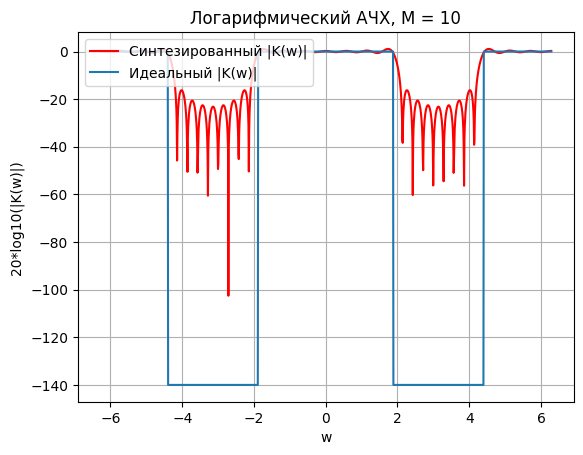

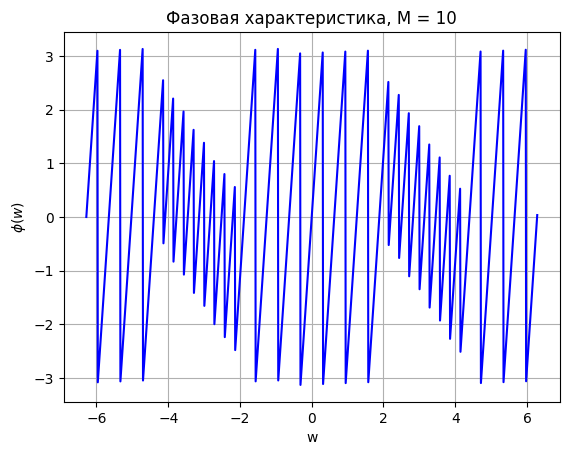

In [24]:
plt.figure()
plt.plot(w, LogFR(np.abs(afr)), 'r')
plt.plot(w, LogFR(IdealResponse(w_p, w)))
plt.legend(['–°–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π |K(w)|', '–ò–¥–µ–∞–ª—å–Ω—ã–π |K(w)|'], loc = 'upper left')
plt.xlabel('w')
plt.ylabel('20*log10(|K(w)|)')
plt.title(f'–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∏–π –ê–ß–•, M = {N}')
plt.grid(True)

plt.figure()
f_2 = Double(f, N)
plt.plot(w, -np.angle(freqz(f_2, 1, w))[1], 'b')
plt.xlabel('w')
plt.ylabel(r'$ \phi(w) $')
plt.title(f'–§–∞–∑–æ–≤–∞—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞, M = {N}')
plt.grid(True)
plt.show()

**–í—ã–≤–æ–¥:** –ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –≤–∏–¥–Ω–æ, —á—Ç–æ –ê–ß–• —Ñ–∏–ª—å—Ç—Ä–∞ —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ –∏–¥–µ–∞–ª—å–Ω–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–µ, –æ–¥–Ω–∞–∫–æ –≤–±–ª–∏–∑–∏ —Ç–æ—á–µ–∫ —Ä–∞–∑—Ä—ã–≤–∞ –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –æ—Å—Ü–∏–ª—è—Ü–∏—è –∏–∑-–∑–∞ —ç—Ñ—Ñ–µ–∫—Ç–∞ –ì–∏–±–±—Å–∞.


### –ó–∞–¥–∞–Ω–∏–µ 2
 –†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é —Å–∏–Ω—Ç–µ–∑–∞ —Ñ–∏–ª—å—Ç—Ä–∞ (—Ç.–µ. –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è
–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ {bk} (k=0,..., 2M)), –∫–æ—Ç–æ—Ä–∞—è –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–µ–µ
—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –∑–∞–¥–∞–Ω–Ω–æ–π –ê–ß–• –ø–æ –º–µ—Ç–æ–¥—É –Ω–∞ –æ—Å–Ω–æ–≤–µ
—á–∞—Å—Ç–æ—Ç–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∞—Ä–≥—É–º–µ–Ω—Ç–æ–≤:
* –ü–æ–ª–æ–∂–µ–Ω–∏–µ –ø–æ–ª–æ—Å—ã –ø—Ä–æ–ø—É—Å–∫–∞–Ω–∏—è –ø—Ä–æ–µ–∫—Ç–∏—Ä—É–µ–º–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞ –Ω–∞ –æ—Å–∏
ùõö
* –ü–æ–ª–æ–∂–µ–Ω–∏–µ –ø–æ–ª–æ—Å—ã –ø–æ–¥–∞–≤–ª–µ–Ω–∏—è –ø—Ä–æ–µ–∫—Ç–∏—Ä—É–µ–º–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞ –Ω–∞ –æ—Å–∏
ùõö
* –ü–∞—Ä–∞–º–µ—Ç—Ä M

–° –ø–æ–º–æ—â—å—é —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ —Å–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞—Ç—å —Ñ–∏–ª—å—Ç—Ä —Ç–æ–≥–æ –∂–µ
–ø–æ—Ä—è–¥–∫–∞ N = 2M, —á—Ç–æ –∏ –≤ –ø. 1.

–°—Ä–∞–≤–Ω–∏—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—É—é –ê–ß–• —Å –∏–¥–µ–∞–ª—å–Ω–æ–π –∏ —Å –ê–ß–•, –Ω–∞–π–¥–µ–Ω–Ω–æ–π –≤ –ø. 1.
–î–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, –≤–æ–∑–Ω–∏–∫–∞—é—â–µ–π –ø—Ä–∏ —Å–∏–Ω—Ç–µ–∑–µ
–ö–ò–•-—Ñ–∏–ª—å—Ç—Ä–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ —á–∞—Å—Ç–æ—Ç–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å
–≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ MATLAB, –Ω–∞–ø—Ä–∏–º–µ—Ä, fmincon, fminsearch.


In [6]:
def A_w(w, h, M):
    a_w = h[M]
    for k in range(1, M + 1):
        a_w += 2 * h[M - k] * np.cos(w * k)
    return a_w

def syntez(x_j, w_p, w_s, M):
    w_j = np.pi * (np.arange(M + 1) + 0.5) / (M + 1)
    flag_pass = (w_j > w_p[0]) & (w_j <= w_p[1])
    flag_stop = (w_j >= w_s[0]) & (w_j < w_s[1])
    K_d = np.zeros_like(w_j)
    K_d[flag_stop] = 0
    K_d[flag_pass] = 1
    K_d[~(flag_stop | flag_pass)] = x_j
    h = np.zeros(M + 1)

    for k in range(M + 1):
        for j in range(M + 1):
            h[M - k] += K_d[j] * np.cos(w_j[j] * k)/ (M + 1)

    E = []
    eps = 0.001
    for i in np.arange(w_s[0], w_s[1], eps):
        E.append(-A_w(i,h,M))
    for i in np.arange(w_p[0], w_p[1], eps):
        E.append(1 - A_w(i,h,M))
    error = max(np.abs(E))
    return error, h

# –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞
def opt_syntez(x, w_p, w_s, M):
    error, _ = syntez(x, w_p, w_s, M)
    return error

In [ ]:
x_j = [0.0,0.0]
w_j = np.pi * (np.arange(M + 1) + 0.5) / (M + 1)
error, h = syntez(x_j, w_p, w_s, M)
print("error:", error)
print("h:", h)

# –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è
result = minimize(opt_syntez, x_j, args=(w_p, w_s, M), method='Nelder-Mead')
opt_x = result.x

# —Ñ–∏–ª—å—Ç—Ä —Å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
error, h = syntez(opt_x, w_p, w_s, M)
print("error:", error)
print("h:", h)

error: 0.9203337279763125
h: [-6.37244474e-02 -4.85722573e-17  7.51681109e-02 -2.77555756e-17
 -1.12497028e-01  1.38777878e-17  3.20364431e-01  5.00000000e-01]
error: 0.055022778454826726
h: [ 0.03423526 -0.02991225 -0.02035369  0.06913275 -0.03688264 -0.10843802
  0.29088501  0.6254927 ]


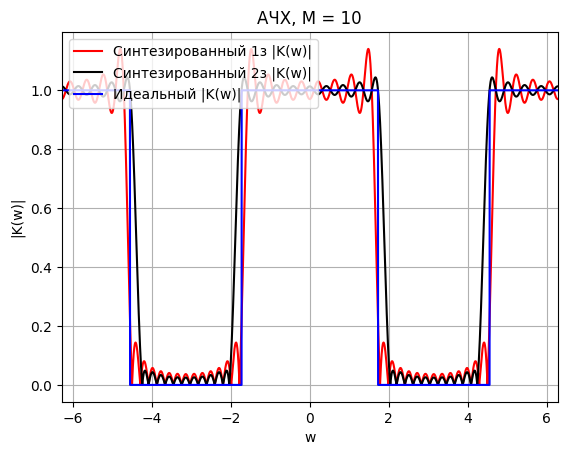

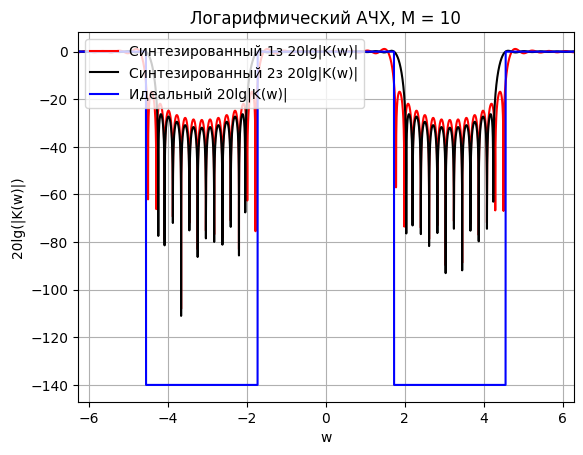

–ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –ê–ß–•
–ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –∏ –ø1. 0.23752532322283137
–ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –∏ –ø2. 0.03735501043442213


In [23]:
plt.figure()
f1 = find_coef(N, IdealFilter(w_p, N))
ach1 = AFR(f1, w, N)
plt.plot(w, np.abs(ach1), 'r')

_ , f2 = syntez(opt_x, w_p, w_s, N)
ach2 = AFR(f2, w, N)
plt.plot(w, np.abs(ach2), 'black')

f3 = IdealResponse(w_p, w)
plt.plot(w, f3, 'b')

plt.xlim(w0, wn)
plt.xlabel('w')
plt.ylabel('|K(w)|')
plt.title(f'–ê–ß–•, M = {N}')
plt.legend(['–°–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π |K(w)|', '–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π |K(w)|', '–ò–¥–µ–∞–ª—å–Ω—ã–π |K(w)|'],loc = 'upper left')
plt.grid()

plt.figure()
plt.plot(w, LogFR(np.abs(ach1)), 'r')
plt.plot(w, LogFR(np.abs(ach2)), 'black')
plt.plot(w, LogFR(np.abs(f3)), 'b')
plt.xlim([w0, wn])
plt.legend(['–°–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π |K(w)|', '–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π |K(w)|', '–ò–¥–µ–∞–ª—å–Ω—ã–π |K(w)|'], loc = 'upper left')
plt.xlabel('w')
plt.ylabel('20lg(|K(w)|)')
plt.title(f'–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∏–π –ê–ß–•, M = {N}')
plt.grid(True)
plt.show()

flag_3 = np.where(filt3==0)
print("–ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –ê–ß–•")
print(f"–ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –∏ –ø1. {np.linalg.norm(filt3[:flag_3[0][0]-100]-np.abs(ach1[:flag_3[0][0]-100]),ord = np.inf)}")
print(f"–ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –∏ –ø2. {np.linalg.norm(filt3[:flag_3[0][0]-100]-np.abs(ach2[:flag_3[0][0]-100]),ord = np.inf)}")

**–í—ã–≤–æ–¥:** –ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞ –º–µ–Ω—å—à–µ –æ—à–∏–±–∫–∏ —Ñ–∏–ª—å—Ç—Ä–∞ –∏–∑ –ø–µ—Ä–≤–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è

### –ó–∞–¥–∞–Ω–∏–µ ‚Ññ3
–ü—Ä–æ–≤–µ—Ä–∏—Ç—å, —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç –ª–∏ —Ñ–∏–ª—å—Ç—Ä, —Å–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –≤ –ø. 2,
—Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º –∫ –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –ê–ß–• –≤ –ø–æ–ª–æ—Å–∞—Ö –ø—Ä–æ–ø—É—Å–∫–∞–Ω–∏—è –∏
–ø–æ–¥–∞–≤–ª–µ–Ω–∏—è –ø—Ä–∏ –∑–∞–¥–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö ùõÖp –∏ ùõÖs.

–û–ø—Ä–µ–¥–µ–ª–∏—Ç—å
–º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ —Ñ–∏–ª—å—Ç—Ä–∞ (N=2M), —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–µ–≥–æ –¥–∞–Ω–Ω—ã–º
—Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º.



In [27]:
dp = 0.0125
ds = 0.015
w_p = [0, 0.6*np.pi]
w_s = [0.8*np.pi,np.pi]
for N in range(1, 30):
    w_j = np.pi * (np.arange(N + 1) + 0.5) / (N + 1)
    flag_pass = (w_j > w_p[0]) & (w_j <= w_p[1])
    flag_stop = (w_j >= w_s[0]) & (w_j < w_s[1])
    K_d = np.zeros_like(w_j)
    x_j = sorted(np.random.uniform(0,1, len(K_d[~(flag_stop | flag_pass)])))
    result = minimize(opt_syntez, x_j, args=(w_p, w_s, N), method='Nelder-Mead')
    opt_x = result.x
    error, h = syntez(opt_x, w_p, w_s, N)
    if (error <= dp) and (error <= ds):
        print(f'–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ N = 2M : {N}')
        break

–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ N = 2M : 12


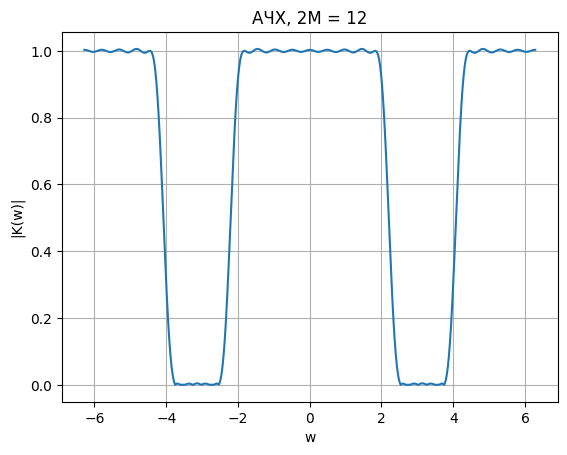

In [28]:
N = 12
w_j = np.pi * (np.arange(N + 1) + 0.5) / (N + 1)
flag_p = (w_j > w_p[0]) & (w_j <= w_p[1])
flag_s = (w_j >= w_s[0]) & (w_j < w_s[1])
K_d = np.zeros_like(w_j)
x_j = sorted(np.random.uniform(0.1,0.9,len(K_d[~(flag_s | flag_p)])))
result = minimize(opt_syntez, x_j, args=(w_p, w_s, N), method='Nelder-Mead')
opt_x = result.x
err, h = syntez(opt_x, w_p, w_s, N)

afr = AFR(h, w, N)
plt.plot(w, np.abs(afr))
plt.title("–ê–ß–•, 2M = 12")
plt.xlabel('w')
plt.ylabel('|K(w)|')
plt.grid()

**–í—ã–≤–æ–¥:** –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –∑–∞–º–µ—Ç–∏–º, —á—Ç–æ, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, –ø—Ä–∏ –ø–æ—Ä—è–¥–∫–µ —Ñ–∏–ª—å—Ç—Ä–∞ N=12  —è–≤–ª–µ–Ω–∏–µ –ì–∏–±–±—Å–∞ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç

### –ó–∞–¥–∞–Ω–∏–µ 4
–° –ø–æ–º–æ—â—å—é —Å–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –≤ –ø. 2 —Ñ–∏–ª—å—Ç—Ä–∞ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —Å–∏–≥–Ω–∞–ª—ã
x(n)=sin(ùõön) –¥–ª—è —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –≤ —Ç–∞–±–ª–∏—Ü–µ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –∑–Ω–∞—á–µ–Ω–∏–π ùõö.


–û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∑–∞–¥–µ—Ä–∂–∫—É ùõº –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–æ–≥–æ –∫–æ–ª–µ–±–∞–Ω–∏—è –Ω–∞ –≤—ã—Ö–æ–¥–µ
—Ñ–∏–ª—å—Ç—Ä–∞.

Omega: 0.30œÄ
–ó–∞–¥–µ—Ä–∂–∫–∞: 0


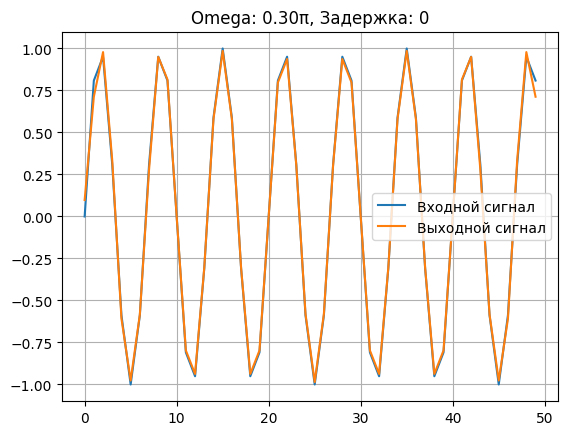

Omega: 0.50œÄ
–ó–∞–¥–µ—Ä–∂–∫–∞: 4


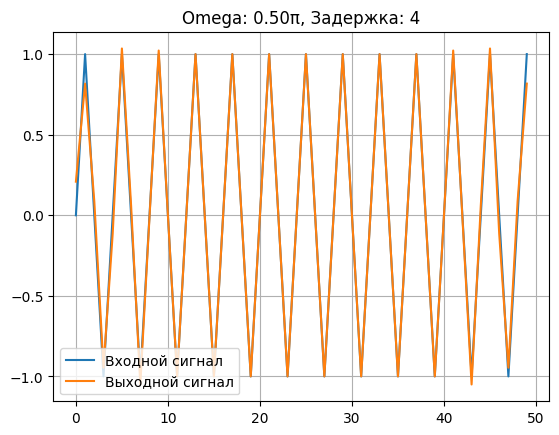

Omega: 0.80œÄ
–ó–∞–¥–µ—Ä–∂–∫–∞: -3


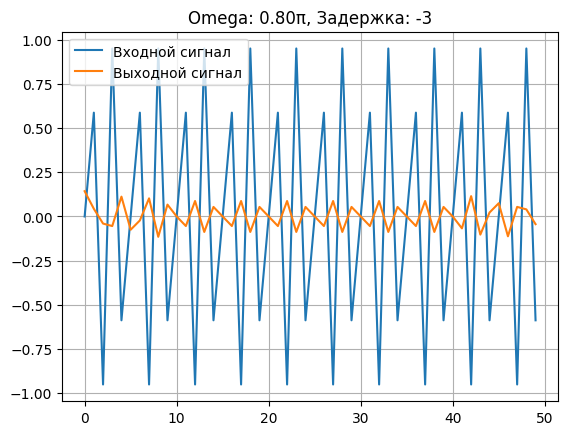

In [29]:
w_p = [0, 0.6*np.pi]
w_s = [0.8*np.pi,np.pi]
M = 5
N = 2*M
x_j = [0.0,0.0]
result = minimize(opt_syntez, x_j, args=(w_p, w_s, N), method='Nelder-Mead')
opt_x = result.x
_ , f = syntez(opt_x, w_p, w_s, N)

ff = f[::-1]
ff = np.hstack((ff[::-1], ff[1::]))
n = np.arange(50)
W = [0.3*np.pi,0.5*np.pi,0.8*np.pi]
for omega in W:
    x = np.sin(omega * n)
    y = signal.fftconvolve(x, ff, mode='same')

    # –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–¥–µ—Ä–∂–∫–∏
    delay = np.argmax(y) - np.argmax(x)
    print(f"Omega: {omega / np.pi:.2f}œÄ")
    print(f"–ó–∞–¥–µ—Ä–∂–∫–∞: {delay}")

    plt.figure()
    plt.plot(n, x, label='–í—Ö–æ–¥–Ω–æ–π —Å–∏–≥–Ω–∞–ª')
    plt.plot(n, y, label='–í—ã—Ö–æ–¥–Ω–æ–π —Å–∏–≥–Ω–∞–ª')
    plt.title(f'Omega: {omega / np.pi:.2f}œÄ, –ó–∞–¥–µ—Ä–∂–∫–∞: {delay}')
    plt.legend()
    plt.grid()
    plt.show()

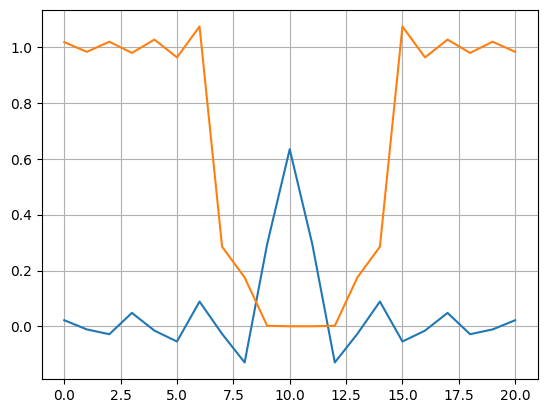

In [44]:
plt.plot(ff)
plt.plot(np.abs(np.fft.fft(ff)))
plt.grid(True)

### –ó–∞–¥–∞–Ω–∏–µ 5

–° –ø–æ–º–æ—â—å—é —Å–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –≤ –ø. 3 —Ñ–∏–ª—å—Ç—Ä–∞ –ø—Ä–æ–≤–µ—Å—Ç–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é
—Ç–µ—Å—Ç–æ–≤–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è - –º–∞—Ç—Ä–∏—Ü—ã I –∏–∑ –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π —Ä–∞–±–æ—Ç—ã 1
(—Å–æ–≥–ª–∞—Å–Ω–æ –≤–∞—Ä–∏–∞–Ω—Ç—É).

 –î–ª—è —ç—Ç–æ–≥–æ –ø—Ä–æ—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ
–∫–∞–∂–¥—É—é —Å—Ç—Ä–æ–∫—É, –∑–∞—Ç–µ–º –∫–∞–∂–¥—ã–π —Å—Ç–æ–ª–±–µ—Ü –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.

–í–æ—Å–ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏
–ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ J –∏ –æ–±—ä—è—Å–Ω–∏—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.


In [32]:
hh = h[::-1]
hh = np.hstack((hh[::-1],hh[1::]))
hh

array([ 5.12402826e-03, -5.90166523e-03, -6.40684132e-04,  1.21657053e-02,
       -1.84417282e-02,  7.12891276e-03,  2.23949352e-02, -4.91916956e-02,
        3.88027597e-02,  3.10047895e-02, -1.45770171e-01,  2.54380039e-01,
        7.00998040e-01,  2.54380039e-01, -1.45770171e-01,  3.10047895e-02,
        3.88027597e-02, -4.91916956e-02,  2.23949352e-02,  7.12891276e-03,
       -1.84417282e-02,  1.21657053e-02, -6.40684132e-04, -5.90166523e-03,
        5.12402826e-03])

(450, 297)


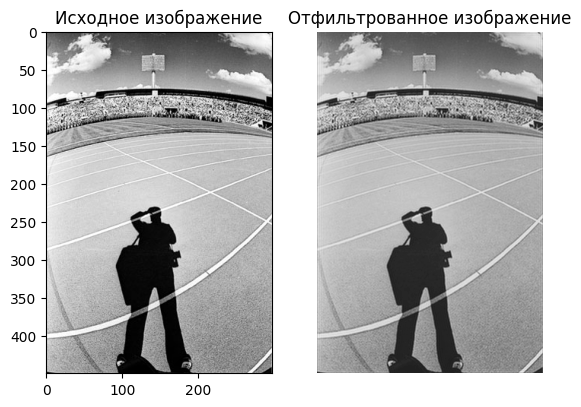

In [41]:
def apply_filter(signal1, h):
    return signal.fftconvolve(signal1, h, mode='same')

im = Image.open('var1.png').convert("L")
im = np.array(im)
print(im.shape)
filtered = np.zeros_like(im, dtype=float)
for i in range(im.shape[0]):
    filtered[i, :] = apply_filter(im[i,:],hh)

filtered2 = np.zeros_like(filtered, dtype=float)
for i in range(im.shape[1]):
    #filtered2[:, i] = filtfilt(h, 1, filtered[:, i])
    filtered2[:, i] = apply_filter(filtered[:,i],hh)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(im,cmap = "gray")
plt.title("–ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ")
plt.subplot(1, 2, 2)
plt.imshow(filtered2,cmap = "gray")
plt.title("–û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ")
plt.axis('off')
plt.show()

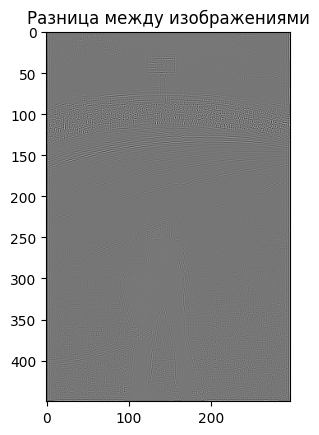

In [43]:
plt.figure()
plt.imshow(im-filtered2,cmap = "gray")
plt.title("–†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏")
plt.show()

------------------------------------------------------------------------------------------